In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Forming merging binaries: Part 1

In [2]:
#functions
def lifetime_beta(m1,m2):                #input: m1 and m2 in Msun
    m1 = m1*msun
    m2 = m2*msun
    beta=(64./5.)*((G**3)*m1*m2*(m1+m2))/c**5
    return beta

def lifetime_funcof_a0_in_yrs(m1,m2,a0): #input: a0 in cm
    tc = a0**4./(4.*lifetime_beta(m1,m2))
    return tc*sec_to_yr                  #output: lifetime in years

def seperation_funcof_lifetime(m1,m2,t): #input: m1 and m2 in Msun, t in s
    sep = (4.*lifetime_beta(m1,m2)*t)**(1./4.)
    return sep                           #output: seperation in cm

def rochelobe_radius_eggletons(a,q):
    r1 = (a* 0.49 *q**(2./3.))/(0.6 *q**(2/3)+np.log(1+q**(1./3.)))
    return r1

In [3]:
#constants

G = 6.67*10**(-8) #cm^3/g/s^2
c = 3.0*10**10 #cm/s
msun = 1.99 * 10**33 #g
rsun = 6.95 * 10**10 #cm
sec_to_yr = 3.17098*10**(-8)
hubble_time =  14.4 * 10**9 #yr
AU_to_cm = 1.496*10**13 #cm

In [53]:
'''
OR

#in geometrical units

G=1
c=1
msun = 4.925491025543576*10**(-6) #s
MetreinSec = 1/(2.998*10**8) #s
rsun = 6.957*10**8 # m
'''

**solutions**

In [4]:
# 3) lifetime of a binary in years, if m1=m2= 1 Msun, for an initial seperation
lifetime_for_10Rsun= lifetime_funcof_a0_in_yrs(1,1,10*rsun)
print(np.format_float_scientific(lifetime_for_10Rsun))

lifetime_for_001AU= lifetime_funcof_a0_in_yrs(1,1,0.01*AU_to_cm)
print(np.format_float_scientific(lifetime_for_001AU))

lifetime_for_01AU= lifetime_funcof_a0_in_yrs(1,1,0.1*AU_to_cm)
print(np.format_float_scientific(lifetime_for_01AU))

lifetime_for_1AU= lifetime_funcof_a0_in_yrs(1,1,1*AU_to_cm)
print(np.format_float_scientific(lifetime_for_1AU))

7.50762042541367e+11
1.6117195093786821e+09
1.611719509378682e+13
1.611719509378682e+17


In [12]:
# 4) Calculate the initial separation of the binary required by it to merge within the hubble time. 
#    Compare this value with the typical radius of the star in its giant phase, R_giant.

sep_in_AU_to_merge_in_hubbletime = seperation_funcof_lifetime(1,1,hubble_time/sec_to_yr)/AU_to_cm
print(np.format_float_scientific(sep_in_AU_to_merge_in_hubbletime))

1.7288935627767052e-02


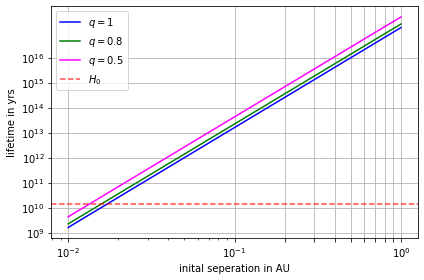

In [22]:
# 3) Calculate the lifetime for a binary star with equal component masses of $1 M_{\odot}$
#for a range of initial separation from 0.01 AU to 1 AU and plot it

sep_array = np.linspace(0.01,1,200)
lifetime_array_q1=[]
lifetime_array_q08=[]
lifetime_array_q05=[]
for i in sep_array:
    lifetime_array_q1.append(lifetime_funcof_a0_in_yrs(1,1,i*AU_to_cm))
    lifetime_array_q08.append(lifetime_funcof_a0_in_yrs(1,0.8,i*AU_to_cm))
    lifetime_array_q05.append(lifetime_funcof_a0_in_yrs(1,0.5,i*AU_to_cm))
    
plt.plot(sep_array,lifetime_array_q1,color='blue' ,label=r'$q=1$')
plt.plot(sep_array,lifetime_array_q08,color='green',label=r'$q=0.8$' )
plt.plot(sep_array,lifetime_array_q05,color='magenta',label=r'$q=0.5$' )
plt.xlabel('inital seperation in AU')
plt.ylabel('lifetime in yrs')
plt.yscale('log')
plt.xscale('log')
plt.xticks([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([10**9,10**10,10**11,10**12,10**13,10**14,10**15,10**16])
plt.axhline(hubble_time,color='red',ls='dashed',label=r'$H_0$',alpha=0.7)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

To merge in hubble time, initial seperation of a binary of 1 msun each, should be a0 ~ 0.01 AU. But as the stars evolve and go to the red giant phase, its radius is R_G ~ 1 AU. If a0<R_G, the stars will engulf each other in this phase and will not form a binary. To survive this phase a0>R_G. However, for a0 > 1 AU, the stars will will not merge in hubble time. This tells that some process is needed to shrink the orbits, for the binaries to be close enough to merge through gravitational-wave emission, after they have evolved through their giant phase.

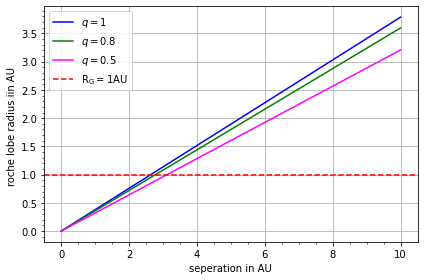

In [26]:
#5) Calculate roche lobe radius 

sep_array = np.linspace(0.001,10,200)
roche_lobe_q1=[]
roche_lobe_q08=[]
roche_lobe_q05=[]

for i in sep_array:
    roche_lobe_q1.append(rochelobe_radius_eggletons(i,1))
    roche_lobe_q08.append(rochelobe_radius_eggletons(i,0.8))
    roche_lobe_q05.append(rochelobe_radius_eggletons(i,0.5))


plt.plot(sep_array,roche_lobe_q1,color='blue',label=r'$q=1$')
plt.plot(sep_array,roche_lobe_q08,color='green',label=r'$q=0.8$')
plt.plot(sep_array,roche_lobe_q05,color='magenta',label=r'$q=0.5$')
plt.xlabel('seperation in AU')
plt.ylabel('roche lobe radius iin AU ')
plt.axhline(1,ls='dashed',color='red',label=r'$\mathrm{R_{G}=1 AU}$')
plt.minorticks_on()
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()

Mass transfer will happen when m1 fills its rochelobe: R_G>R_rb.
Typically, R_G ~ 1 AU

So, mass transfer will occur when R_rb<1AU.
This will happen for $a \lesssim 3AU$
